# 1. Coin tossing
## First we need to make sure that we have all required dependencies installed. 
#### Numpy is a dependency used for numerical calculations
#### Matplotlib is a dependecy used for plotting

In [ ]:
# Run me to install dependencies
!pip install numpy
!pip install matplotlib

## Import and set Matplotlib settings

In [1]:
# Run me for imports
import numpy as np
import matplotlib.pyplot as plt

# Update matplotlib font size
plt.rcParams.update({'font.size': 16})

## Set Parameters

In [53]:
# Experiment parameters
n_repetitions = 2000
n_coins = 100
p = 0.5

## Sample and save the fraction of tails

In [54]:
# Working variable for the fraction of tails
fraction_tails = [None]*n_repetitions

# Throw coins: Heads is 0, tails is 1.
for i in range(n_repetitions):
    # Flip n coins
    sample = np.random.randint(0, 2, n_coins)
    fraction_tails[i] = sum(sample)/len(sample)    


## Show a single sample

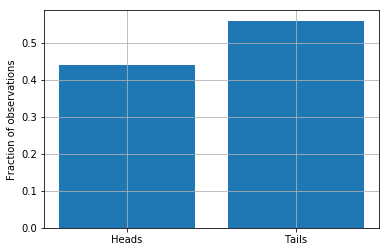

In [55]:
# Plot the last run (via global fraction_tails)
def plot_single_run():
    plt.grid()
    plt.bar(x = [0,1], height = [1 - fraction_tails[-1], fraction_tails[-1]])
    plt.gca().set_xticks([0,1])
    plt.gca().set_xticklabels(("Heads", "Tails"))
    plt.ylabel("Fraction of observations")
    plt.show()

# Plot last run
plot_single_run()

## Plot the fractions of all runs

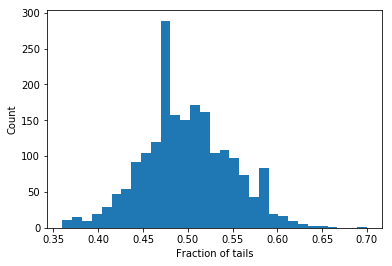

In [71]:
# Plot parameters
n_bins = "auto"

# Show all runs combined in a histogram
def plot_all_runs(data, x_label, y_label, n_bins):
    plt.hist(data, bins=n_bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
# Plot the data
plot_all_runs(fraction_tails, "Fraction of tails", "Count", n_bins)


# 2. Dice

## Specify the number of throws

In [81]:
n_throws = 5000
show_value = False  # Show the values of the single throws in the next block of code

## Throw the dice

In [82]:
# Working variable for holding the sum values
dice_sum = [None]*n_throws

# Throw dice
for i in range(n_throws):
    # Throw 2 dice
    throw = np.random.randint(0, 7, 2)
    dice_sum[i] = sum(throw)
    
    # Show value (if opted)
    if show_value:
        print(dice_sum[i])

## Plot throws

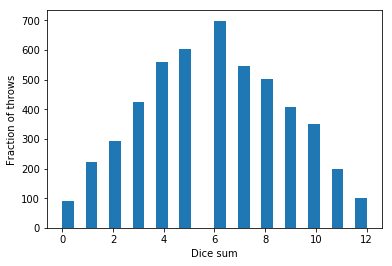

In [83]:
# Plot parameters
n_bins = "auto"

# Plot the data
plot_all_runs(dice_sum, "Dice sum", "Fraction of throws", n_bins)